# Deep Learning Using Tensorflow  

In [0]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Tensorflow version 1.13.1
Pandas version 0.22.0
Numpy version 1.14.6


# Function to model

y = a * x^2 + b * x + c 

In [8]:
# Let's generate 1000 random samples

pool = np.random.rand(1000,1).astype(np.float32)


# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000*0.15)

# 15% test
test_x  = pool[0:sample]

#85% training
train_x = pool[sample:]

print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [9]:
df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

,x,y
0,0.534010,7.172362
1,0.217926,5.748762
2,0.188820,5.637765
3,0.059280,5.184869
4,0.701199,8.086959


In [10]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.483364,7.078678
std,0.284161,1.415480
min,0.000921,5.002765
25%,0.240188,5.835945
50%,0.481200,6.906705
75%,0.730796,8.260517
max,0.996712,9.977005


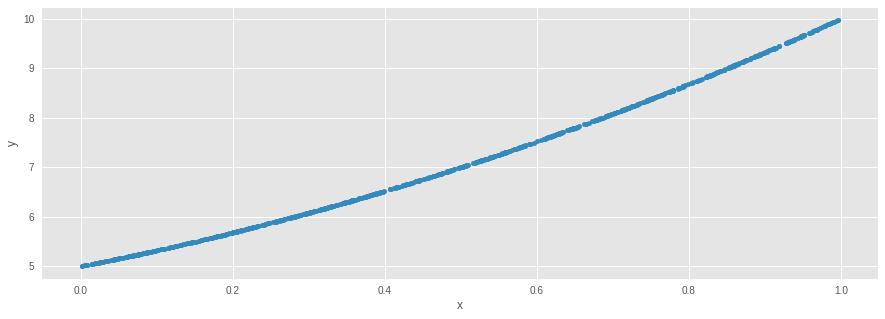

In [11]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

# Helper Functions

In [0]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    # tf.random_normal([what is the size of your batches, size of output layer])
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size], mean=0.1, stddev=0.1))
    
    # tf.random_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([out_size], mean=0.1, stddev=0.1))
    
    # shape of pred = [size of your batches, size of output layer]
    pred = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = pred
    else:
        outputs = activation_function(pred)
    return outputs
  

# Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's matrix multiplication function (matmul) as shown below.

      The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...

    shape = [how many data points do you have, how many features does each data point have]

For this lesson since we are doing a simple regression, we only have one feature (x). We use the None keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [13]:
# you can adjust the number of neurons in the hidden layers here
hidden_size = 100

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


Note that the input of one layer becomes the input of the next layer.

In [14]:
# create your hidden layers!
h1 = add_layer(x, 1, hidden_size, tf.nn.relu)
h2 = add_layer(h1, hidden_size, hidden_size, tf.nn.relu)

print("shape of hidden layers:")
print(h1.get_shape(), h2.get_shape())

Instructions for updating:
Colocations handled automatically by placer.
shape of hidden layers:
(?, 100) (?, 100)


In [15]:
# Output Layers
pred = add_layer(h2, hidden_size, 1)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [0]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.003)
train = optimizer.minimize(loss)

# How Good is Your model?
Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [0]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training Time!

In [18]:
# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(3000):

        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%200==0:
           
            # capture the step and error for analysis
            t.append((step, train_loss))    
            
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
                
            print("Training loss at step %d: %f" % (step, train_loss))                              
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

Training loss at step 0: 138.290222
Training loss at step 200: 0.000875
Training loss at step 400: 0.000634
Training loss at step 600: 0.000536
Training loss at step 800: 0.000482
Training loss at step 1000: 0.000442
Training loss at step 1200: 0.000409
Training loss at step 1400: 0.000380
Training loss at step 1600: 0.000354
Training loss at step 1800: 0.000332
Training loss at step 2000: 0.000312
Training loss at step 2200: 0.000295
Training loss at step 2400: 0.000279
Training loss at step 2600: 0.000265
Training loss at step 2800: 0.000251
Accuracy on the Training Set: 0.9917647
Accuracy on the Test Set: 0.99333334


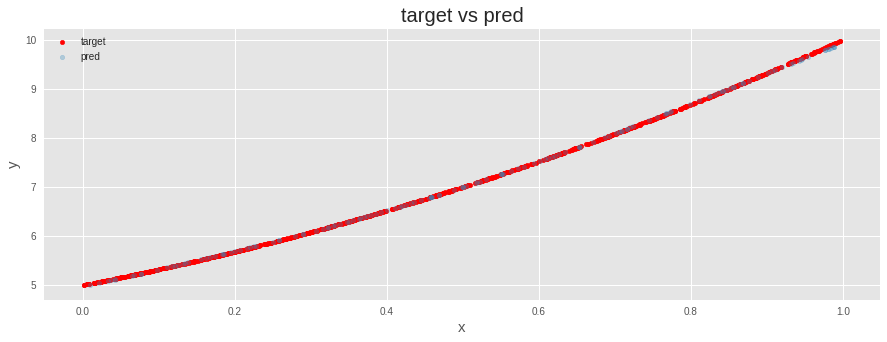

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

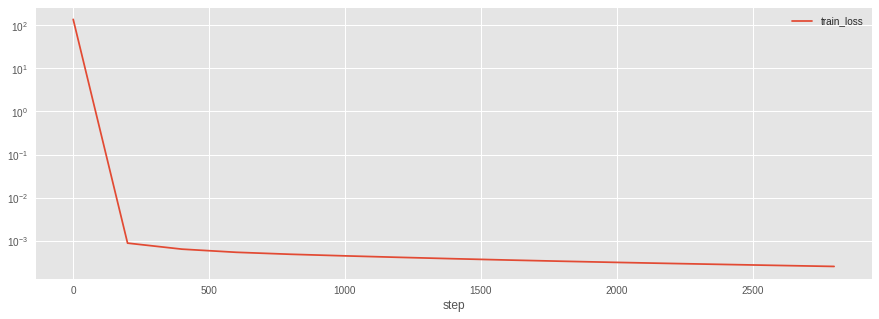

In [20]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));
